In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import h5py
import os
import analysis

In [2]:
# # Run to determine the difference in observables after gauge transformation.
# file = '/Users/theoares/lqcd/npr_momfrac/testing/output/cl3_16_48_b6p1_m0p2450_14503/cfg200.h5'
# f = h5py.File(file, 'r')
# propprime_p2222 = f['propprime/p2222/cfg200'][()]
# prop_p2222 = f['prop/p2222/cfg200'][()]
# delta = prop_p2222 - propprime_p2222
# scale = np.abs(prop_p2222[0, 0, 0, 0])
# print(np.max(delta / scale)) # first order entries are of size 10^4

In [3]:
cfgbase = 'cl3_16_48_b6p1_m0p2450'
# job_num = 14505
job_num = 14533
base = './output/' + cfgbase + '_' + str(job_num)

# base = './examples/analysis_EXAMPLE.py'
props, threepts = analysis.readfile(base)    # C should be a dictionary whose keys are the momentum slices.

V = analysis.get_hypervolume()
for p in props:
    props[p]= props[p] / V    # TODO keep this up to date with the QLUA normalization.

In [4]:
mom_list = analysis.get_mom_list()
s = 0    # TODO seed this with something random
props_boot = analysis.bootstrap(props, seed = s)
threept_boot = analysis.bootstrap(threepts, seed = s)

In [5]:
props_inv = analysis.invert_prop(props_boot)
Γ = analysis.amputate(props_inv, threept_boot)
Zq = analysis.quark_renorm(props_inv)
Γ_B, Γ_B_inv = analysis.born_term()
Z = analysis.get_Z(Zq, Γ, Γ_B_inv)

In [6]:
μ, σ = analysis.get_statistics_Z(Z)
print(μ)
print(σ)

{'p2222': (1.0119895e-15-0.00075596786j), 'p2224': (-3.3122832e-15-0.0011351294j), 'p2226': (-7.606462e-15-0.0013949007j), 'p3332': (1.3641745e-15-0.00064540707j), 'p3334': (-5.026362e-16-0.0008824249j), 'p3336': (3.569363e-15-0.0010882723j), 'p3338': (5.514206e-15-0.0013006759j), 'p4444': (5.514591e-17-0.0003336957j), 'p4446': (4.453509e-15-0.0004251688j), 'p4448': (-1.2662074e-15-0.0003865444j)}
{'p2222': 0.00030384713, 'p2224': 0.0004781116, 'p2226': 0.00078035484, 'p3332': 0.00037530903, 'p3334': 0.00045521438, 'p3336': 0.00065257587, 'p3338': 0.0010215847, 'p4444': 0.0005455162, 'p4446': 0.00064383325, 'p4448': 0.00083211286}


<IPython.core.display.Javascript object>


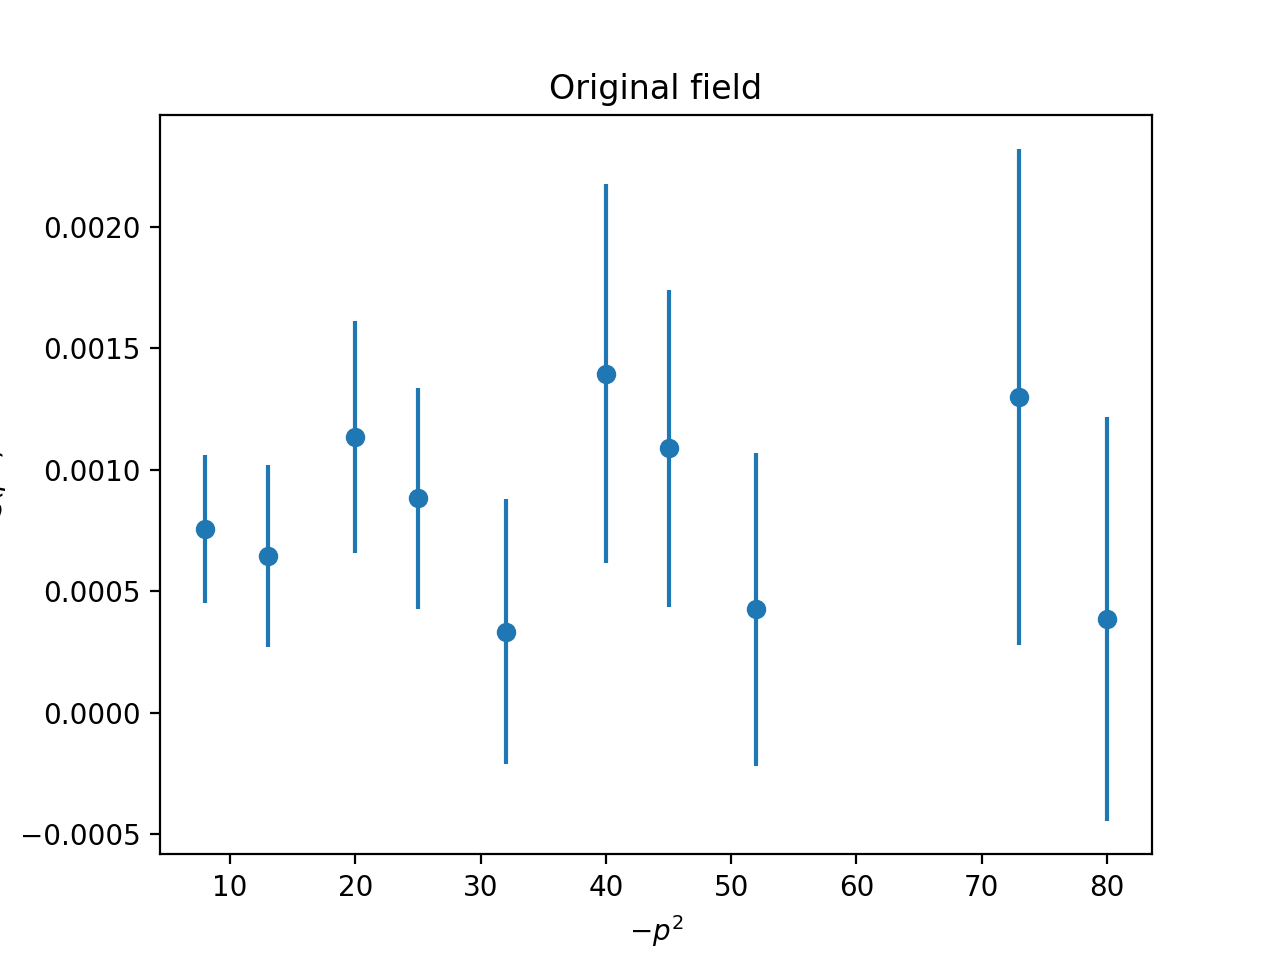

In [15]:
p_squared = np.array([np.abs(analysis.square(p)) for p in mom_list])
μ_list = np.array([μ[analysis.plist_to_string(p)] for p in mom_list])
σ_list = np.array([σ[analysis.plist_to_string(p)] for p in mom_list])
plt.figure()
plt.errorbar(p_squared, np.real(μ_list), yerr = np.abs(σ_list), fmt = 'o')
plt.ylabel('$\mathcal{Z}(p^2)$')
plt.xlabel('$-p^2$')
plt.title('Original field')
plt.show()

In [8]:
props1, threepts1 = analysis.readfile(base, True)    # C should be a dictionary whose keys are the momentum slices.
for p in props1:
    props1[p]= props1[p] / V    # TODO keep this up to date with the QLUA normalization.

In [9]:
props_boot1 = analysis.bootstrap(props1, seed = s)
threept_boot1 = analysis.bootstrap(threepts1, seed = s)

In [10]:
props_inv1 = analysis.invert_prop(props_boot1)
Γ1 = analysis.amputate(props_inv1, threept_boot1)
Zq1 = analysis.quark_renorm(props_inv1)
Z1 = analysis.get_Z(Zq1, Γ1, Γ_B_inv)

In [11]:
μ1, σ1 = analysis.get_statistics_Z(Z1)
print(μ1)
print(σ1)

{'p2222': (8.3077124e-17+0.00044051628j), 'p2224': (-2.6401233e-15+0.0008737974j), 'p2226': (2.7533801e-15+0.0013638324j), 'p3332': (-4.841187e-15+0.0004667821j), 'p3334': (2.2451178e-15+0.0006664522j), 'p3336': (-5.665505e-15+0.0008762667j), 'p3338': (9.157546e-15+0.0009710408j), 'p4444': (1.0607749e-14+0.0005753974j), 'p4446': (-4.805077e-16+0.0007731327j), 'p4448': (9.679818e-15+0.00087746204j)}
{'p2222': 0.00041036154, 'p2224': 0.0006614329, 'p2226': 0.00094978, 'p3332': 0.0004557428, 'p3334': 0.0005947798, 'p3336': 0.00076244044, 'p3338': 0.0009270006, 'p4444': 0.0006480145, 'p4446': 0.00070674455, 'p4448': 0.0009717128}


<IPython.core.display.Javascript object>


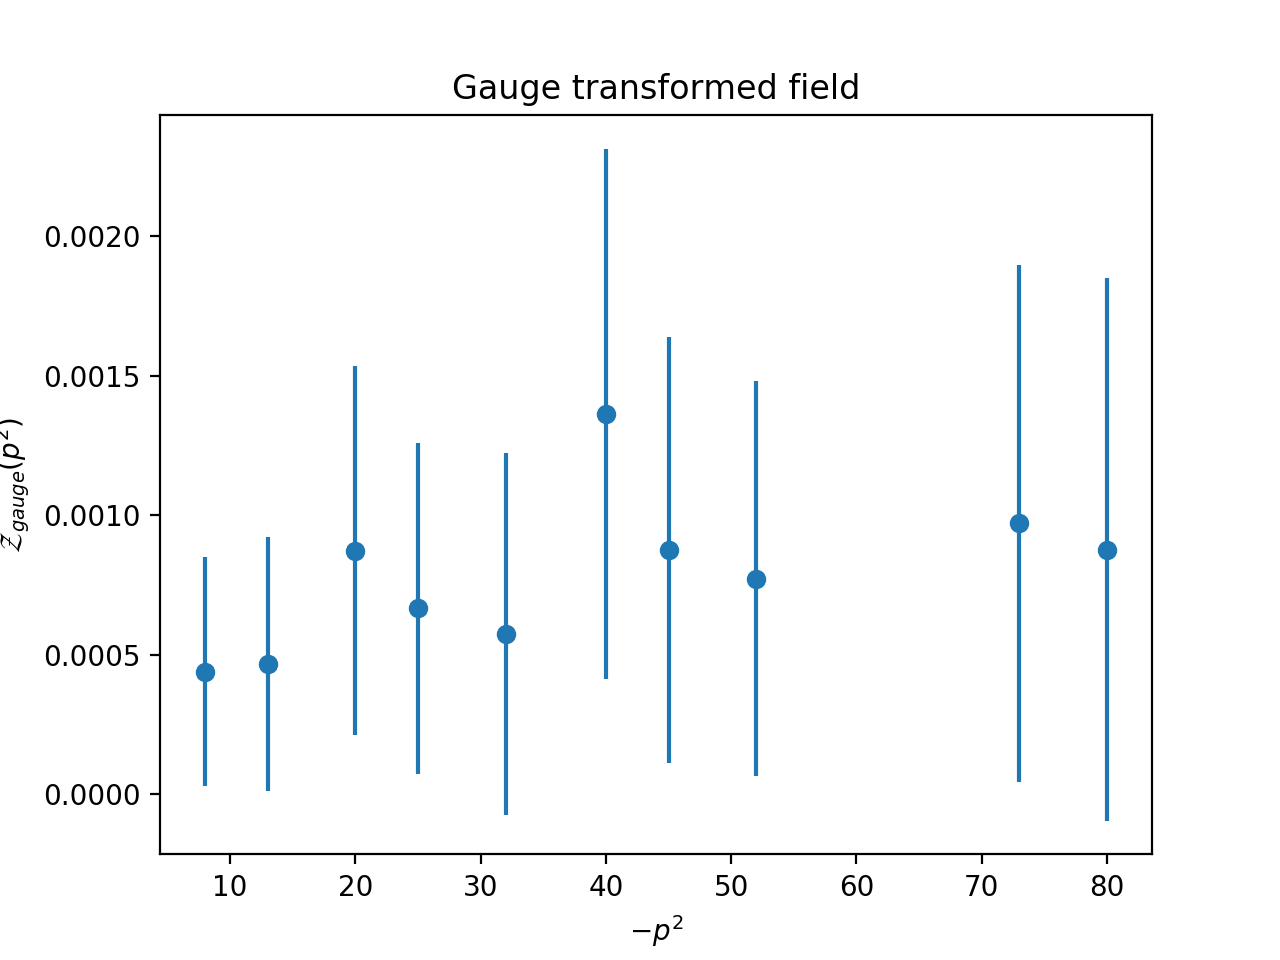

In [17]:
μ_list1 = np.array([μ1[analysis.plist_to_string(p)] for p in mom_list])
σ_list1 = np.array([σ1[analysis.plist_to_string(p)] for p in mom_list])
plt.figure()
plt.errorbar(p_squared, np.abs(μ_list1), yerr = np.abs(σ_list1), fmt = 'o')
plt.ylabel('$\mathcal{Z}_{gauge}(p^2)$')
plt.xlabel('$-p^2$')
plt.title('Gauge transformed field')
plt.show()

<IPython.core.display.Javascript object>


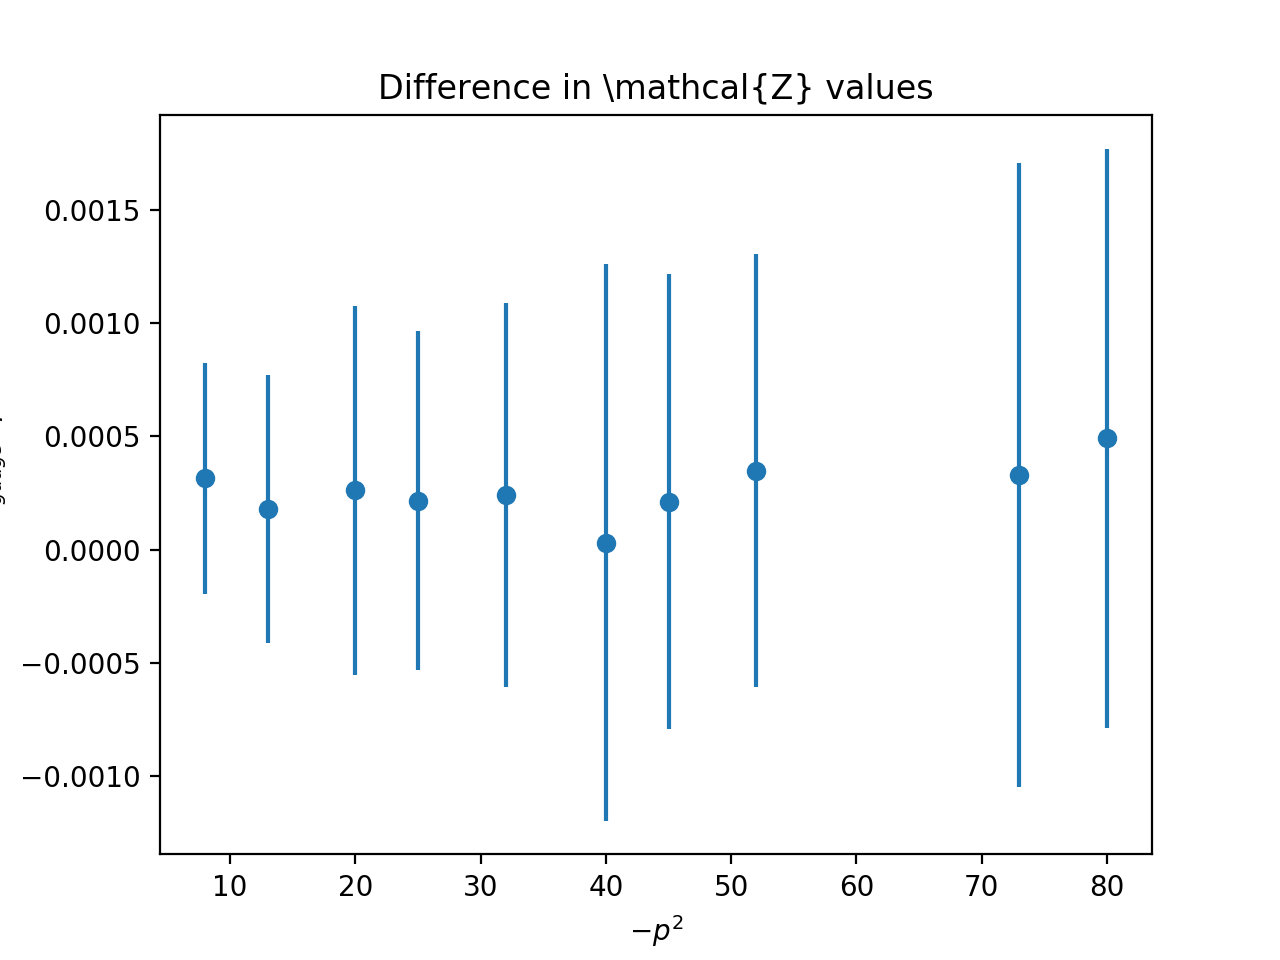

In [13]:
Δ = np.abs(μ_list) - np.abs(μ_list1)
σ_Δ = np.sqrt(σ_list ** 2 + σ_list1 ** 2)
plt.figure()
plt.errorbar(p_squared, np.abs(Δ), yerr = np.abs(σ_Δ), fmt = 'o')
plt.ylabel('$(\mathcal{Z} - \mathcal{Z}_{gauge})(p^2)$')
plt.xlabel('$-p^2$')
plt.title('Difference in \mathcal{Z} values')
plt.show()

There is a phase difference of about -1 between the original field and the gauge transformed field. Is there something I'm doing that's systematically creating that after the code is run?